# Baseball case study
## We will predict the number of wins for a given team, after analyzing the dataset
### Before we start analyzing the data, first we import some important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("Baseball case study.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [4]:
df.shape

(30, 17)

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df.keys()

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [10]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

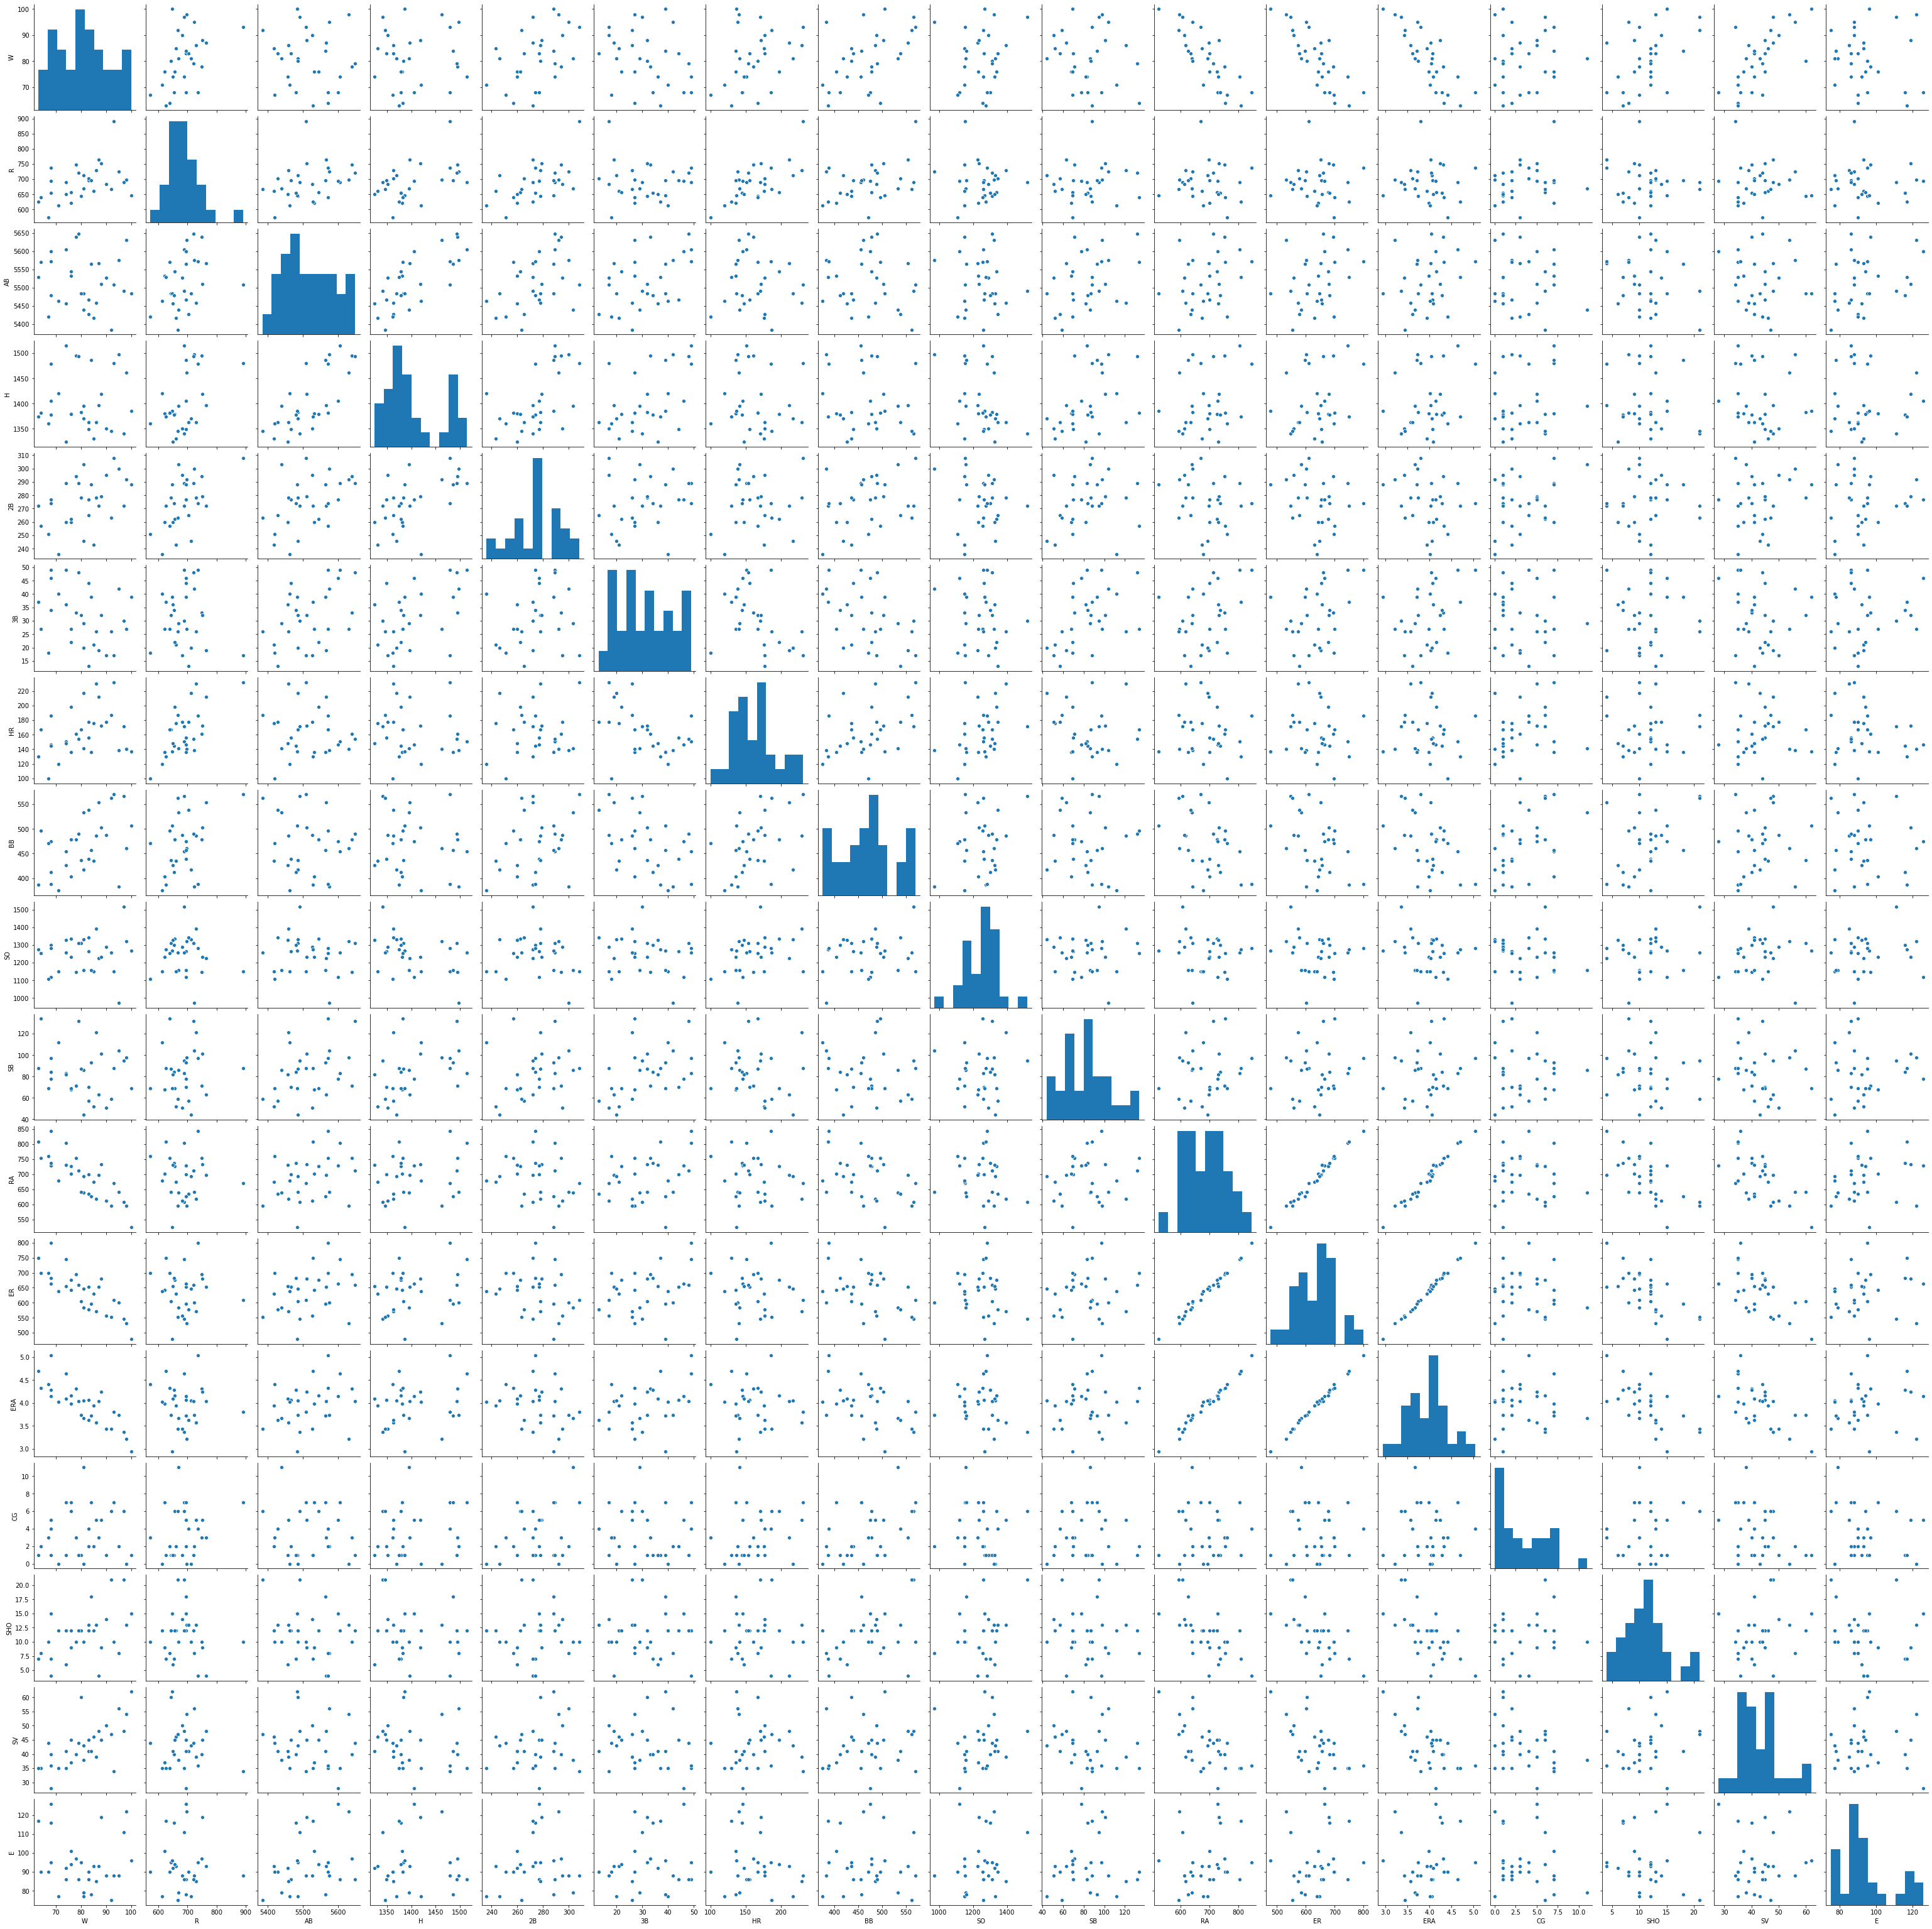

In [11]:
sns.pairplot(df)

Text(0.5, 1.0, 'Distribution of wins')

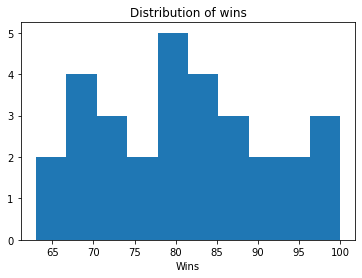

In [12]:
# Plotting distribution of wins

plt.hist(df["W"])
plt.xlabel("Wins")
plt.title("Distribution of wins")

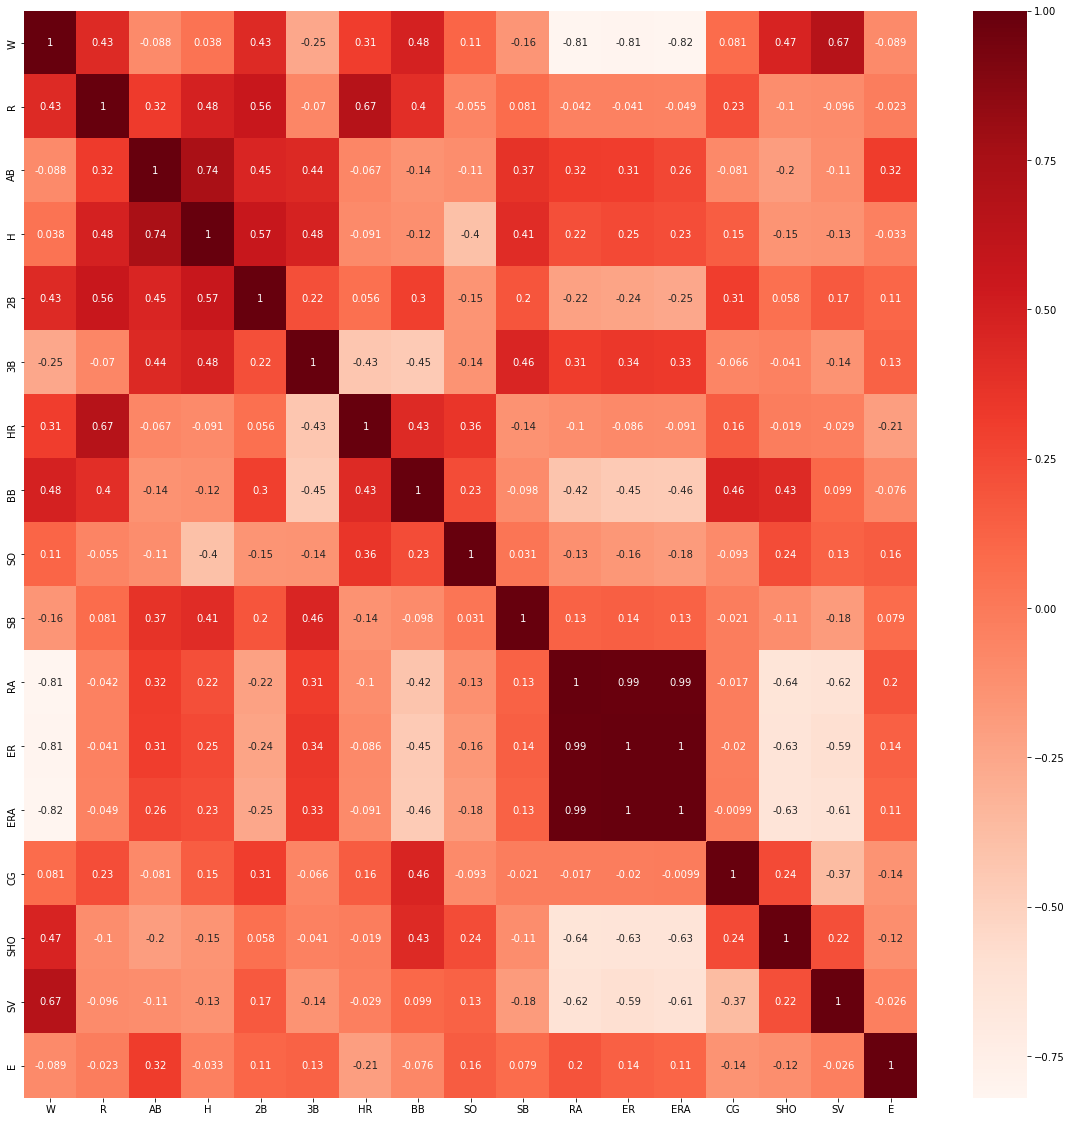

In [13]:
corrmat= df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Reds")

[Text(0.5, 0, 'RA'),
 Text(1.5, 0, 'ER'),
 Text(2.5, 0, 'ERA'),
 Text(3.5, 0, 'W'),
 Text(4.5, 0, 'SV'),
 Text(5.5, 0, 'BB'),
 Text(6.5, 0, 'SHO'),
 Text(7.5, 0, 'HR'),
 Text(8.5, 0, 'SO'),
 Text(9.5, 0, 'CG'),
 Text(10.5, 0, 'R'),
 Text(11.5, 0, '2B'),
 Text(12.5, 0, 'E'),
 Text(13.5, 0, 'AB'),
 Text(14.5, 0, 'H'),
 Text(15.5, 0, '3B'),
 Text(16.5, 0, 'SB')]

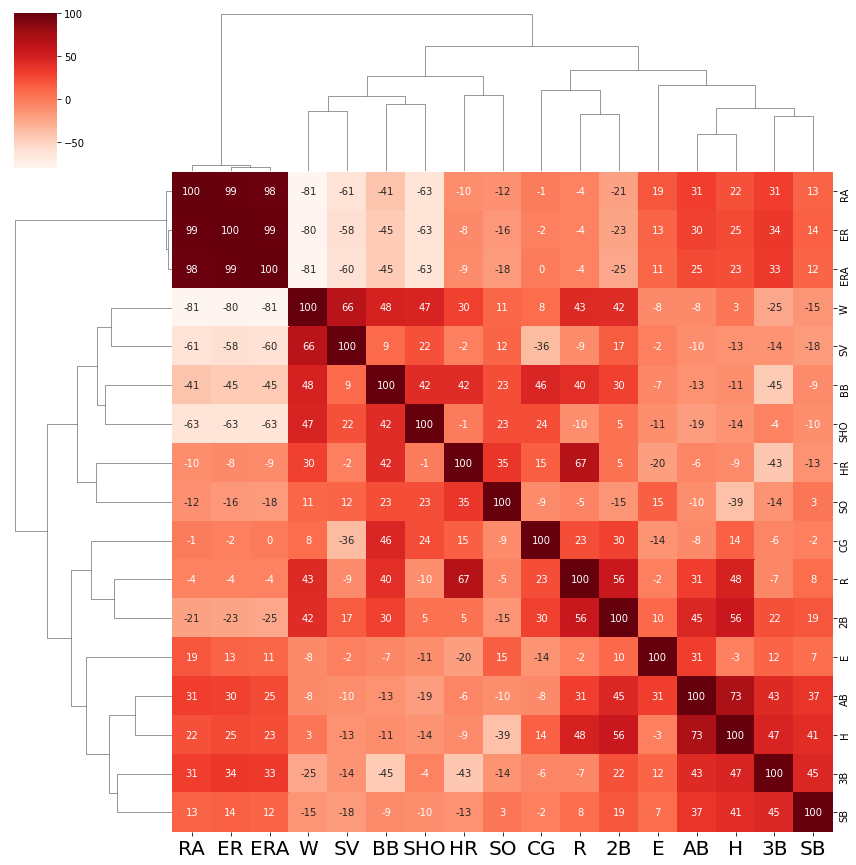

In [14]:
corr=df.corr().mul(100).astype(int)
g=sns.clustermap(data=corr,annot=True, fmt="d", cmap="Reds", figsize=(12,12))
cmap = sns.diverging_palette(h_neg=500, h_pos=500, s=100, l=0, as_cmap=True)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(),fontsize=20)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_ymajorticklabels(),fontsize=20)

##### After seeing above grpah, we can see, RA, ER, ERA are highly correlated with almost 1 value. R & HR are also highly correlated with almopst 0.7 value.


W         AxesSubplot(0.125,0.125;0.0383663x0.755)
R       AxesSubplot(0.17104,0.125;0.0383663x0.755)
AB     AxesSubplot(0.217079,0.125;0.0383663x0.755)
H      AxesSubplot(0.263119,0.125;0.0383663x0.755)
2B     AxesSubplot(0.309158,0.125;0.0383663x0.755)
3B     AxesSubplot(0.355198,0.125;0.0383663x0.755)
HR     AxesSubplot(0.401238,0.125;0.0383663x0.755)
BB     AxesSubplot(0.447277,0.125;0.0383663x0.755)
SO     AxesSubplot(0.493317,0.125;0.0383663x0.755)
SB     AxesSubplot(0.539356,0.125;0.0383663x0.755)
RA     AxesSubplot(0.585396,0.125;0.0383663x0.755)
ER     AxesSubplot(0.631436,0.125;0.0383663x0.755)
ERA    AxesSubplot(0.677475,0.125;0.0383663x0.755)
CG     AxesSubplot(0.723515,0.125;0.0383663x0.755)
SHO    AxesSubplot(0.769554,0.125;0.0383663x0.755)
SV     AxesSubplot(0.815594,0.125;0.0383663x0.755)
E      AxesSubplot(0.861634,0.125;0.0383663x0.755)
dtype: object

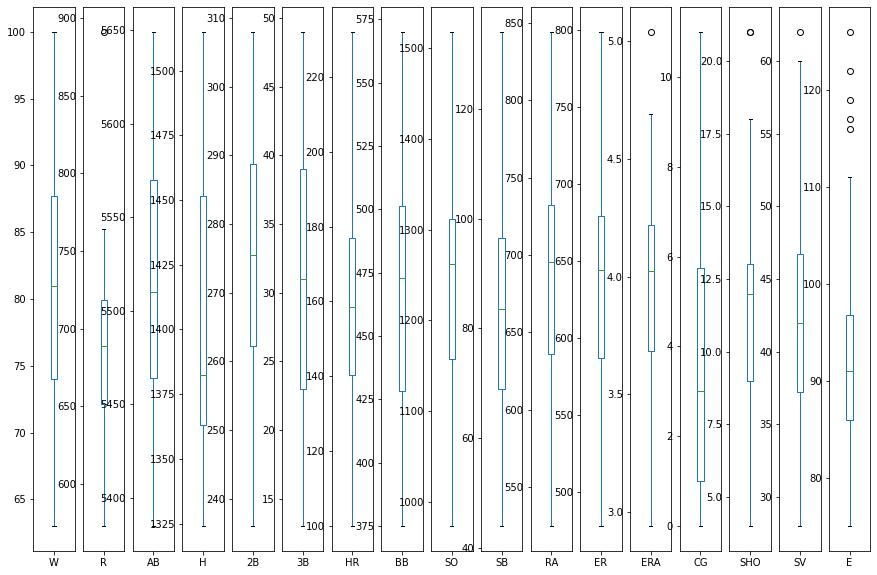

In [15]:
df.plot(kind="box", subplots=True, figsize=(15,10))

##### From boxplot we can understand some of the values of varirablesuch as SHO,  EV, ERA, R

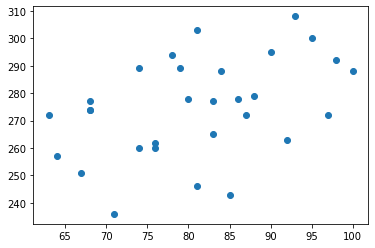

In [16]:
plt.scatter(df.iloc[:,0],df.iloc[:,4])

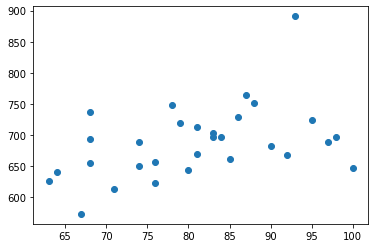

In [17]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])

##### From above Scatter plot we can understand the positive realaitonship between eadc other
##### Now we are going to see the histogram og highly correlated attributes

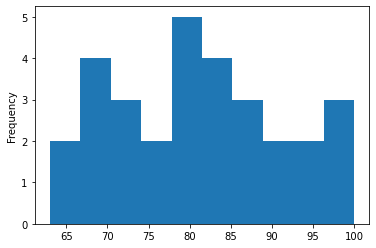

In [18]:
df["W"].plot.hist()

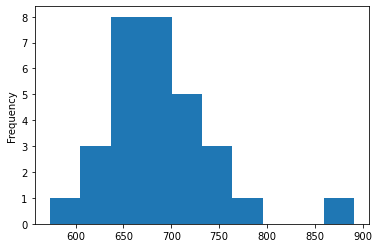

In [19]:
df["R"].plot.hist()

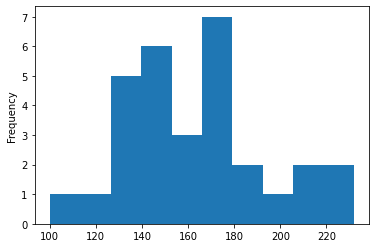

In [20]:
df["HR"].plot.hist()

## Remove Outliers
##### Now we are going to reove the outliers by using Z-score

In [21]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(30, 17)


In [22]:
df1=df.loc[(z_score<3).all(axis=1)]
df1.shape

(29, 17)

#####  After removing the outliers, the shape of our dataset is changed to (29,17)


In [23]:
df1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

### There are some attributes with skewness, we will treat them to maintain skewness of our data

In [24]:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])
df1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

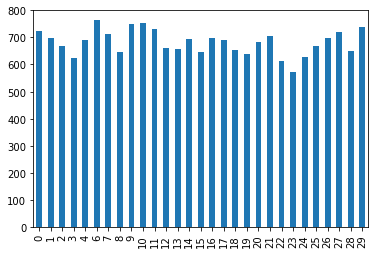

In [25]:
df1["R"].plot.bar()

##### There is not a big diffrence 

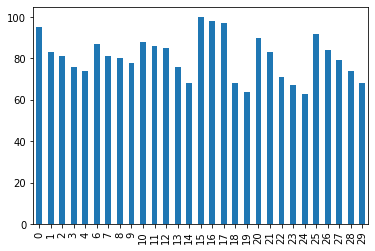

In [26]:
df1["W"].plot.bar()

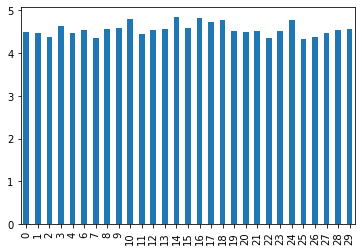

In [27]:
df1["E"].plot.bar()

##### From above graph we can see the errors by different team

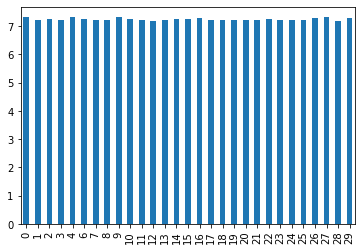

In [28]:
df1["H"].plot.bar()

##### Hits by different different team is almost same

## Model Building

##### Seperating our dataset into input and target variables

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# defining x, y 
dx = df1.drop(columns=["W"])
y = df1[["W"]]

# Scaling x,y
x=sc.fit_transform(dx)
x=pd.DataFrame(x,columns=dx.columns)

In [30]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

##### Defining the models & appending all the models

In [31]:
lr=LinearRegression()
knn=KNeighborsRegressor()
ls=Lasso()
rd=Ridge()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()
ada=AdaBoostRegressor()

models=[]
models.append(("LinearRegression",lr))
models.append(("KNeighborsRegressor",knn))
models.append(("Lasso",ls))
models.append(("Ridge",rd))
models.append(("RandomForestRegressor",rf))
models.append(("GradientBoostingRegressor",gbr))
models.append(("AdaBoostRegressor",ada))

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


Model=[]
RState=[]
score=[]

for name, model in models:
    print("===========",name,"===========")
    print("\n")
    Model.append(name)
    max_r2_score=0.0
    for r_state in range (42,101):
        x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.17,random_state=r_state)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr
            final_r_state=r_state
    print("Final Random State is:", final_r_state)
    print("\n")
    RState.append(final_r_state*1)
    print("R2 score : ", max_r2_score)
    print("\n")
    score.append(max_r2_score*100)
    print("\n")

=========== LinearRegression ===========


Final Random State is: 67


R2 score :  0.9222372872932244




=========== KNeighborsRegressor ===========


Final Random State is: 71


R2 score :  0.8503846153846147




=========== Lasso ===========


Final Random State is: 68


R2 score :  0.9877515977312986




=========== Ridge ===========


Final Random State is: 47


R2 score :  0.9607868243596892




=========== RandomForestRegressor ===========


Final Random State is: 68


R2 score :  0.8542699864498645




=========== GradientBoostingRegressor ===========


Final Random State is: 95


R2 score :  0.8315104149747602




=========== AdaBoostRegressor ===========


Final Random State is: 64


R2 score :  0.9409191382900843






In [33]:
ovr_all_result= pd.DataFrame({"Models":Model, "Random_State":RState,"R2_score":score})
ovr_all_result

,Models,Random_State,R2_score
0,LinearRegression,67,92.223729
1,KNeighborsRegressor,71,85.038462
2,Lasso,68,98.775160
3,Ridge,47,96.078682
4,RandomForestRegressor,68,85.426999
5,GradientBoostingRegressor,95,83.151041
6,AdaBoostRegressor,64,94.091914


##### We can say after seeing above overall result, Lasso Model is the best model among all with almost 99% R2 score, so we wil find out the other best parameters for Lasso model with gridsearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {"alpha": [0.0001,0.001,0.01,0.09,0.1,1]}
clf=GridSearchCV(ls,parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [35]:
# again we building the model withh best aprameters 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.17, random_state=68)
ls=Lasso(alpha=1).fit(x_train,y_train)
ls_pred = ls.predict(x_test)
print("R2 score : ", r2_score(y_test,ls_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,ls_pred)))

R2 score :  0.9877515977312986
RMSE :  0.850379721032979


In [36]:
from sklearn.model_selection import cross_val_score
print("Mean R2 score of Lasso model is:", cross_val_score(ls,x,y,cv=5,scoring="r2").mean())
print("Std of Lasso model is : ",cross_val_score(ls,x,y,cv=5,scoring="r2").mean())

Mean R2 score of Lasso model is: 0.49033824821340977
Std of Lasso model is :  0.49033824821340977


##### Let's see the actual & predicted values

In [37]:
print("Actual Wins:\n",y_test)
print("Predicted Wins:\n",ls_pred)

Actual Wins:
      W
20  90
28  74
29  68
26  84
2   81
Predicted Wins:
 [90.15722372 75.82775867 67.57448062 84.26126321 80.96866146]


##### After seeing above values, we can our model is predicting, pretty well

## Saving the model
##### We are going to save the Lasso model, because it gives almost 99% correct result. Saving by Joblib

In [38]:
import joblib
joblib.dump(ls,"Lasso_Baseball_wins_prediction.obj")

['Lasso_Baseball_wins_prediction.obj']

## Conclusion
##### After applying all the models on the Baseball case study, Lasso model did really great work in predicting the value swith almost 99% of correct values, for predicting the number of wins a baseball team.